# 2. Seperate Data Set

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [52]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [66]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 [독립변수]
Y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속변수 - 결과)

In [67]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, Y) # 학습(모델 생성)

LinearRegression()

In [56]:
Y_pred = reg.predict(X) # X에 대한 예측 값
Y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

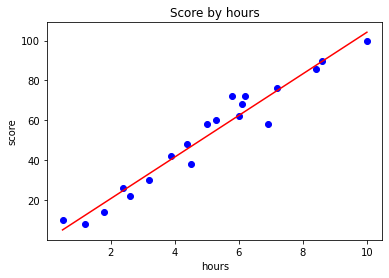

In [57]:
plt.scatter(X, Y, color = 'blue') # 산점도
plt.plot(X, Y_pred, color = 'red') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # Y축 이름
plt.show()

### 데이터 세트 분리

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('LinearRegressionData.csv')

In [59]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, :-1].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
# 훈련 80: 테스트 20 으로 분리

In [61]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [62]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [63]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [68]:
Y, len(Y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [70]:
Y_train, len(Y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [71]:
Y_test, len(Y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [73]:
reg.fit(X_train, Y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화(훈련 세트)

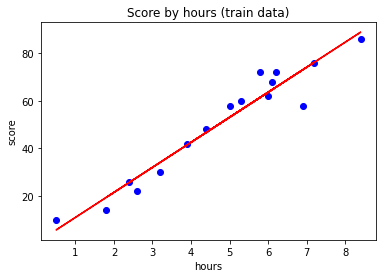

In [75]:
plt.scatter(X_train, Y_train, color = 'blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color = 'red') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # Y축 이름
plt.show()

### 데이터 시각화(테스트 세트)

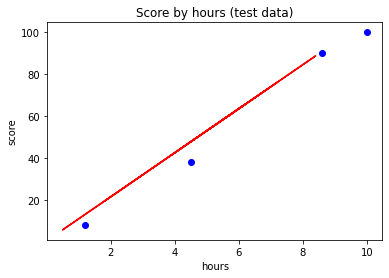

In [78]:
plt.scatter(X_test, Y_test, color = 'blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color = 'red') # 선 그래프
plt.title('Score by hours (test data)') # 제목
plt.xlabel('hours') # x축 이름
plt.ylabel('score') # Y축 이름
plt.show()

In [79]:
reg.coef_ # 기울기 m

array([10.49161294])

In [80]:
reg.intercept_ # y절편

0.6115562905169796

### 모델 평가

In [81]:
reg.score(X_test, Y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [82]:
reg.score(X_train, Y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668